Task 4

>>> Завантажуємо дані...
>>> Навчаємо модель...
>>> Робимо прогноз...
------------------------------
Результати моделювання:
Середня помилка (MAE): 4213.80 $
Точність (R2 Score):   0.78
------------------------------

Як фактори впливають на ціну (згідно з моделлю):
       Фактор  Вплив на ціну ($)
0         Вік         257.071158
1  BMI (Вага)         327.522631
2        Діти         427.199971
3     Куріння       23653.211646


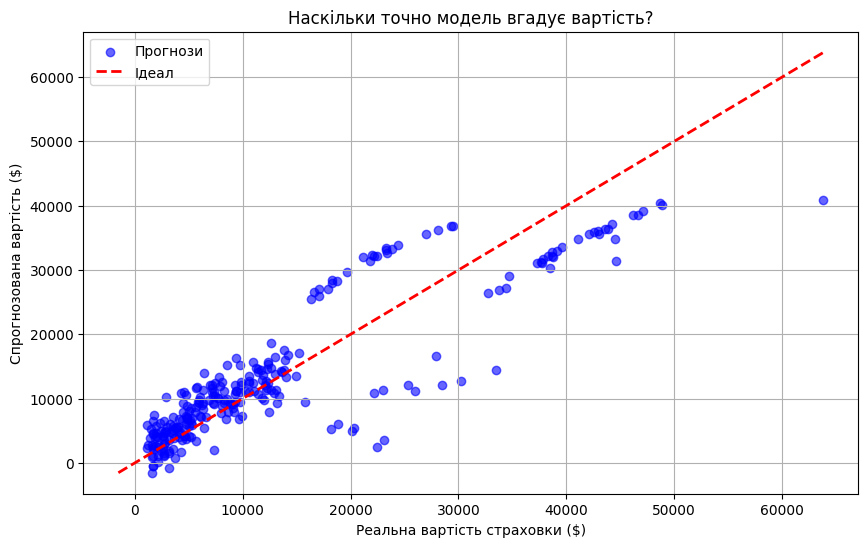

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('insurance.csv')

df['smoker_numeric'] = df['smoker'].map({'yes': 1, 'no': 0})

X = df[['age', 'bmi', 'children', 'smoker_numeric']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(">>> Робимо прогноз...")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"Результати моделювання:")
print(f"Середня помилка (MAE): {mae:.2f} $") 
print(f"Точність (R2 Score):   {r2:.2f}")     
print("-" * 30)

coeff_df = pd.DataFrame({
    'Фактор': ['Вік', 'Вага', 'Діти', 'Куріння'],
    'Вплив на ціну ($)': model.coef_
})
print("\nЯк фактори впливають на ціну (згідно з моделлю):")
print(coeff_df)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Прогнози')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ідеал')

plt.xlabel('Реальна вартість страховки ($)')
plt.ylabel('Спрогнозована вартість ($)')
plt.title('Наскільки точно модель вгадує вартість?')
plt.legend()
plt.grid(True)
plt.show()